In [1]:
%pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.api.types import is_numeric_dtype
from scipy.stats import pearsonr
from factor_analyzer import FactorAnalyzer
from matplotlib.patches import Circle

In [3]:
df_freelancer = pd.read_csv('input/FreeLancerT.csv') 
df_freelancer

,Country,CountryCode,Continent,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,Aruba,ABW,NaN,1.918226,NaN,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,Angola,AGO,AF,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,Albania,ALB,EU,7.783173,0.241072,NaN,0.551021,6.956642,0.241072,12.397975,0.860970
3,Andorra,AND,EU,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,United Arab Emirates,ARE,AS,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...,...,...,...
185,Vanuatu,VUT,OC,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,Samoa,WSM,OC,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,Yemen Rep.,YEM,AS,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,South Africa,ZAF,AF,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


### Inlocuirea datelor lipsa cu media sau modul
- Setul de date prezinta valori lipsa pe care vom corecta
- Datele numerice se inlocuiesc cu media 
    - Datele numerice lipsa se marcheaza cu NaN
- Pentru ca nu exista medie pentru date non numerice ele se inlocuiesc cu modul
    - Datele non numerice lipsa se marcheaza cu NaN
- Pentru a inlocui datele lipsa va trebui sa iteram prin fiecare coloana din setul de date
    - Daca coloana curenta este de tip numeric atunci inlocuiesc cu media
    - Daca coloana curenta este de tip string atunci inlocuiesc cu modul

In [4]:
for column in df_freelancer.columns:
    #prima conditie in for determina tipul de date | a doua conditie in for este pentru eficienta
    if (is_numeric_dtype(df_freelancer[column])) and df_freelancer[column].isna().any():
        df_freelancer[column].fillna(df_freelancer[column].mean(), inplace=True)
    else: 
        df_freelancer[column].fillna(df_freelancer[column].mode(), inplace=True)
df_freelancer

/run/user/1000/ipykernel_45994/1543480200.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_freelancer[column].fillna(df_freelancer[column].mode(), inplace=True)
/run/user/1000/ipykernel_45994/1543480200.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

,Country,CountryCode,Continent,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,Aruba,ABW,EU,1.918226,0.140219,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,Angola,AGO,AF,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,Albania,ALB,EU,7.783173,0.241072,4.593976,0.551021,6.956642,0.241072,12.397975,0.860970
3,Andorra,AND,EU,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,United Arab Emirates,ARE,AS,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...,...,...,...
185,Vanuatu,VUT,OC,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,Samoa,WSM,OC,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,Yemen Rep.,YEM,AS,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,South Africa,ZAF,AF,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


- Analiza in componente principale se aplica doar pe acele variabile numerice din dataframe
- Extragem variabilele numerice si le stergem pe restul

In [5]:
df_freelancer_numerical = df_freelancer.iloc[:, 3:]
df_freelancer_numerical

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,1.918226,0.140219,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,7.783173,0.241072,4.593976,0.551021,6.956642,0.241072,12.397975,0.860970
3,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...
185,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


### 1_ Varianta pe componente
- Pentru a calcula varianta pe componente folosim din sklearn StandardScaler si PCA
    - StandardScaler este folosit pentru a standardiza datele 
    - PCA este folosit pentru a calcula variantele pe datele standardizate

In [6]:
#Se standardizeaza datele folosind StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_freelancer_numerical)

#Se creaza modelul PCA si i se introduc datele
pca = PCA()
pca.fit(scaled_data)

#Se calculeaza varianta pe componente provenita din PCA
variance_ratio = pca.explained_variance_ratio_
#Optional --> Calculeaza varianta cumulativa
cumulative_variance = np.cumsum(variance_ratio)

In [7]:
variance_ratio

array([6.59781658e-01, 2.35728127e-01, 4.90572825e-02, 3.56152317e-02,
       1.16125362e-02, 4.98159589e-03, 2.59393907e-03, 6.29629865e-04])

In [8]:
cumulative_variance

array([0.65978166, 0.89550978, 0.94456707, 0.9801823 , 0.99179484,
       0.99677643, 0.99937037, 1.        ])

In [9]:
for i, var in enumerate(variance_ratio):
    print(f"PC{i+1} Variance Explained: {var:.4f} ({var*100:.2f}%)")
    print(f"Cumulative Variance: {cumulative_variance[i]:.4f} ({cumulative_variance[i]*100:.2f}%)")
    print("=======================================")

PC1 Variance Explained: 0.6598 (65.98%)
Cumulative Variance: 0.6598 (65.98%)
PC2 Variance Explained: 0.2357 (23.57%)
Cumulative Variance: 0.8955 (89.55%)
PC3 Variance Explained: 0.0491 (4.91%)
Cumulative Variance: 0.9446 (94.46%)
PC4 Variance Explained: 0.0356 (3.56%)
Cumulative Variance: 0.9802 (98.02%)
PC5 Variance Explained: 0.0116 (1.16%)
Cumulative Variance: 0.9918 (99.18%)
PC6 Variance Explained: 0.0050 (0.50%)
Cumulative Variance: 0.9968 (99.68%)
PC7 Variance Explained: 0.0026 (0.26%)
Cumulative Variance: 0.9994 (99.94%)
PC8 Variance Explained: 0.0006 (0.06%)
Cumulative Variance: 1.0000 (100.00%)


### 2_ Plot varianta componente cu evidentierea criteriilor de relevanta
- Pentru a crea plot-ul ne folosim de matplotlib

In functia plot():
- Primul parametru range(1, len(variance_ratio) + 1) reprezinta valorile de pe axa X
    - Valorile de pe axa X sunt o serie care reprezinta index-ul fiecarei valori din variance_ration
- Al doilea parametru reprezinta valorile propriu-zise ale variantei
    - Sunt valorile efective ale array-ului variance_ratio
- Al treilea parametru "bo-" tine de cum arata valorile 
    - "b" --> Inseamna ca avem culoare albastra
    - "o" --> Inseamna ca avem puncte 
    - "-" --> Inseamna ca punctele trebuiesc conectate cu linii

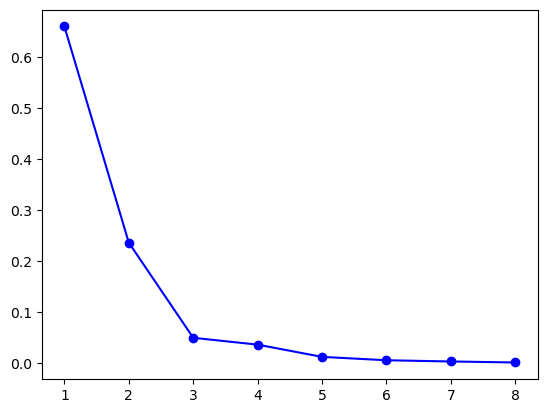

In [10]:
#Grafic doar cu variance_ratio
plt.plot(range(1, len(variance_ratio) + 1),
         variance_ratio, 'bo-')
plt.show()

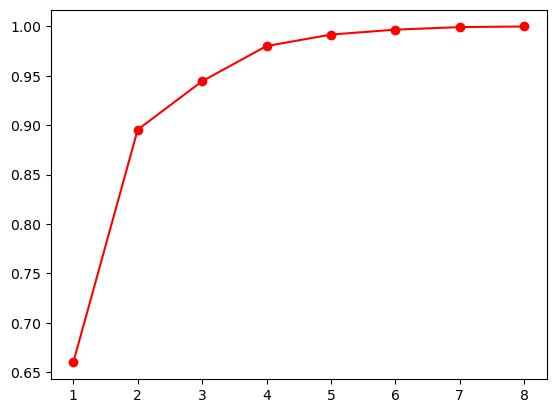

In [11]:
#Grafic cu varianta cumulativa
plt.plot(range(1, len(cumulative_variance) + 1),
         cumulative_variance, 'ro-')
plt.show()

#### Grafic cu ambele componente descrise

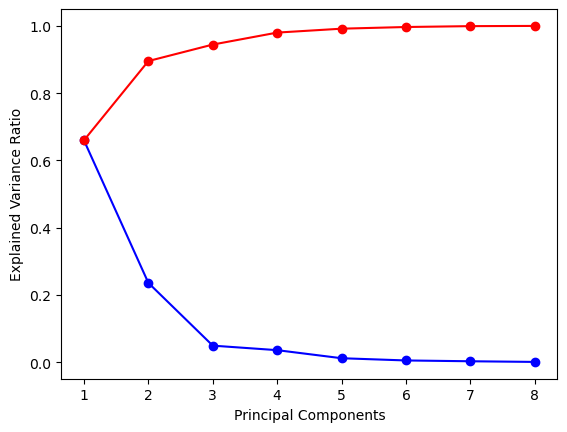

In [12]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

### 3_ Calcul corelatii factoriale 
- Calculul se realizeaza folosind libraria factor_analyzer
- Se da ca si valoare la n_factors numarul de componente principale ?
- Se folosesc datele standardizate 

In [48]:
fa = FactorAnalyzer(
    rotation='varimax',
    n_factors=7,  # Specify the number of factors you want to extract
    impute='mean'  # Handle missing values by replacing with mean
)

fa.fit(scaled_data)

factor_correlations = fa.loadings_

In [49]:
fa.loadings_

array([[ 9.38632029e-01,  2.72058560e-01,  7.76320086e-02,
         5.39586715e-02,  1.08262127e-01,  3.36889699e-04,
         7.50286995e-02],
       [ 5.84187738e-02,  3.85178313e-01,  3.38765075e-01,
         8.53403869e-01,  1.26474210e-02, -2.30392014e-03,
         2.45691804e-04],
       [ 3.60402259e-01,  7.83626838e-01,  3.18616697e-01,
         3.64453530e-01, -9.20220682e-04,  1.29246245e-01,
         5.52007738e-04],
       [ 9.83172400e-01,  1.25999795e-01,  5.83795991e-02,
         4.61238752e-02, -4.95393873e-02,  5.43830500e-02,
        -4.01624551e-02],
       [ 7.95754519e-01,  4.48549144e-01,  2.35214252e-01,
         1.04511964e-01,  3.06218773e-01, -4.49260344e-03,
         4.22698920e-03],
       [ 6.12215721e-02,  3.01521317e-01,  8.70719529e-01,
         2.87864945e-01,  2.19716946e-02,  5.53083042e-04,
         1.05041305e-03],
       [ 3.66132262e-01,  8.10065080e-01,  2.94717536e-01,
         3.20624983e-01,  4.78986797e-02, -1.13110679e-01,
         3.7480012

### 4_ Trasare corelograma pentru corelatii factoriale 
- Se foloseste heatmap din libraria Seaborn 
- Principalul parametru pe care heatmap-ul il primeste este fa.loadings_ calculat la (3)
- I se specifica proprietati vizuale 
    - Important sa se seteze vmin si vmax la 1

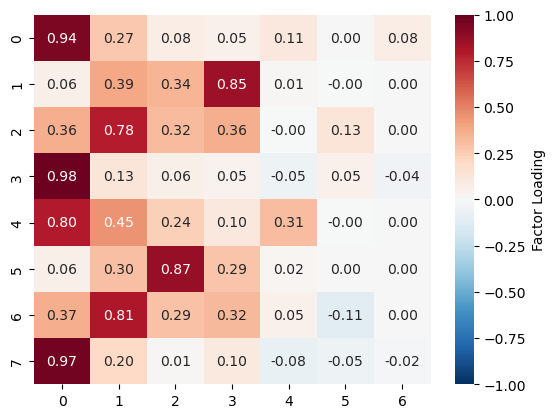

In [61]:
# Generăm heatmap-ul folosind seaborn
heatmap = sns.heatmap(
    fa.loadings_,
    annot=True,           # Afișează valorile numerice
    cmap='RdBu_r',       # Schema de culori (roșu-albastru)
    vmin=-1,            # Valoarea minimă pentru scală
    vmax=1,             # Valoarea maximă pentru scală
    fmt='.2f',          # Formatul numerelor (2 zecimale)
    cbar_kws={'label': 'Factor Loading'}  # Eticheta barei de culori
)

### 5_ Trasare cercul corelatiilor
- Cercul corelatiilor se face cu matplotlib
- Se foloseste tot setul de date normalizat pe care s-a aplicat procedura de la puctul (3) pentru a obtine fa.loadings_

In [76]:
#pentru manipulare mai usoara am pus loadings intr-un dataframe
loadings = pd.DataFrame(
    fa.loadings_,
    columns=[f'Factor {i+1}' for i in range(7)],
)

In [77]:
loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
0,0.938632,0.272059,0.077632,0.053959,0.108262,0.000337,0.075029
1,0.058419,0.385178,0.338765,0.853404,0.012647,-0.002304,0.000246
2,0.360402,0.783627,0.318617,0.364454,-0.000920,0.129246,0.000552
3,0.983172,0.126000,0.058380,0.046124,-0.049539,0.054383,-0.040162
4,0.795755,0.448549,0.235214,0.104512,0.306219,-0.004493,0.004227
5,0.061222,0.301521,0.870720,0.287865,0.021972,0.000553,0.001050
6,0.366132,0.810065,0.294718,0.320625,0.047899,-0.113111,0.003748
7,0.966799,0.201556,0.012593,0.101525,-0.076773,-0.053376,-0.023175


!! Cerul corelatiilor intre Factor 1 si Factor 2
TODO --> Vezi cum poti sa pui text pe buline...

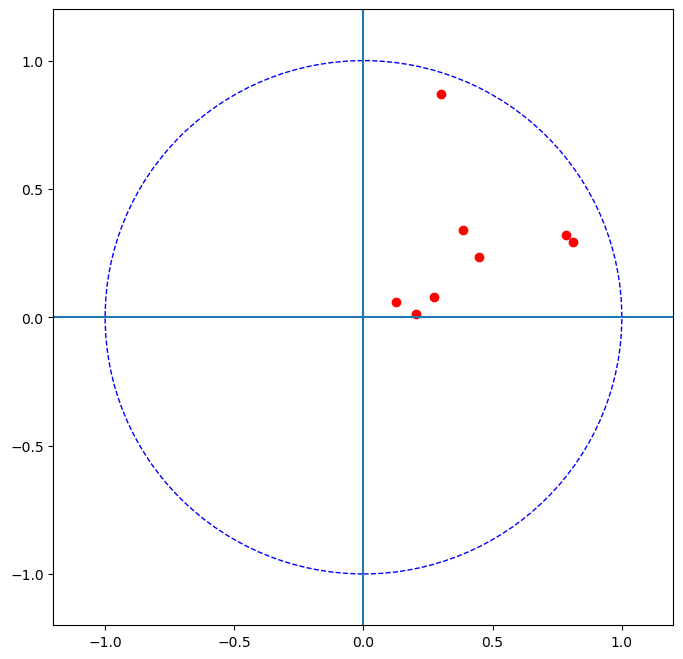

In [95]:
fig, ax = plt.subplots(figsize=(8,8))
circle = Circle((0,0), 1, fill=False, color ='blue', linestyle="--")
ax.add_patch(circle)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

ax.scatter(loadings.iloc[:, 1], loadings.iloc[:, 2], c='r')
ax.axhline(0) #linie orizontala care trece prin (0,0)
ax.axvline(0) #linie verticala care trece prin (0,0)
# for i, (x, y) in enumerate(zip(loadings['Factor 1'], loadings['Factor 2'])):
#     ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue', ec='blue', alpha=0.5)


### 6_ Calculare componente/scoruri


In [102]:
components = pca.components_
scores = pca.transform(scaled_data)

### 7_ Plot componente/scoruri

### 8_ Calcul cosinus 
- Se creaza o matrice care are forma la pca.components_
- Iteram prim matricea goala iar pentru fiecare element i,j cosinusurile au formula:
    - loadings[i,j] * sqrt(pca.explained_varience_[i])
        - Loadings[i,j] reprezinta eigenvectors
        - pca.explained_variance[i] reprezinta eigenvalue

In [107]:
pca_restul = pca.fit_transform(scaled_data)
loadings = pca.components_
loadings.shape

(8, 8)

In [109]:
cos_values = np.zeros((loadings.shape[0], loadings.shape[1]))
for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        #loadings[i,j] --> Eigenvectors
        #pca.explained_varience_[i] --> EigenValues
        #cos_values = eigenvectors * sqrt(eigenvalues)
        cos_values[i,j] = loadings[i,j] * np.sqrt(pca.explained_variance_[i])

In [110]:
cos_values

array([[ 8.90284767e-01,  5.94856858e-01,  8.77645391e-01,
         8.26712807e-01,  9.47398723e-01,  5.53771392e-01,
         8.78503299e-01,  8.54405197e-01],
       [-4.37844948e-01,  6.75889496e-01,  3.84532017e-01,
        -5.29047947e-01, -1.79312687e-01,  6.50011374e-01,
         3.57151280e-01, -4.87120779e-01],
       [ 3.79525301e-02, -1.87780632e-01, -1.82624087e-01,
         8.95733244e-02,  5.25930546e-02,  5.23814122e-01,
        -1.98260315e-01, -1.85592980e-03],
       [ 5.99710915e-03,  3.91304914e-01, -1.58767588e-01,
         1.40352950e-01, -1.42056067e-01, -8.40866038e-03,
        -2.21015380e-01,  1.38814075e-01],
       [ 7.14611963e-02,  7.88430171e-02, -1.06467817e-01,
        -9.01618427e-02,  2.19283470e-01, -3.79690103e-02,
        -4.48210009e-02, -1.05207127e-01],
       [ 6.51700058e-03, -1.78084540e-03,  1.30142237e-01,
         4.72025112e-02,  1.94425874e-02, -1.27012210e-02,
        -1.23349395e-01, -7.14037705e-02],
       [ 1.19734273e-01,  6.862350

### 9_ Calcul contributii
- Calculul contributiilor se bazeaza pe loadings la patrat
- Se creaza un array cu valori de 0 care are aceeasi forma ca si loadings 
- pentru fiecare element din squared_loadings se aplica formula:
    - Element_curent = (element_curent/suma_elemente_linie) * 100

In [116]:
loadings = pca.components_
#squared_loadings = correlations
squared_loadings = loadings ** 2
squared_loadings.shape

(8, 8)

In [117]:
#np.zeros_like creaza un array gol care este de acelasi tip si are acelasi shape ca si array-ul dat ca input --> squared_loadings
#array-ul creat e gol
variable_contributions = np.zeros_like(squared_loadings)

#iteram pe linii 
#pentru fiecare linie se aplica formula
for i in range(squared_loadings.shape[0]):
    row_sum = np.sum(squared_loadings[i])
    for j in range(squared_loadings.shape[1]):
        variable_contributions[i,j] = (squared_loadings[i,j]/row_sum) * 100

In [118]:
variable_contributions

array([[1.49374293e+01, 6.66872678e+00, 1.45163066e+01, 1.28803395e+01,
        1.69154505e+01, 5.77935019e+00, 1.45447001e+01, 1.37576970e+01],
       [1.01122430e+01, 2.40967352e+01, 7.79959086e+00, 1.47637566e+01,
        1.69601171e+00, 2.22868517e+01, 6.72839116e+00, 1.25164198e+01],
       [3.65086855e-01, 8.93750546e+00, 8.45338882e+00, 2.03363082e+00,
        7.01086362e-01, 6.95455162e+01, 9.96291245e+00, 8.73047394e-04],
       [1.25564349e-02, 5.34580418e+01, 8.80047549e+00, 6.87741977e+00,
        7.04534100e+00, 2.46851669e-02, 1.70540463e+01, 6.72743410e+00],
       [5.46804020e+00, 6.65606578e+00, 1.21374605e+01, 8.70435696e+00,
        5.14876329e+01, 1.54365303e+00, 2.15106848e+00, 1.18517221e+01],
       [1.06009611e-01, 7.91593392e-03, 4.22752568e+01, 5.56134619e+00,
        9.43534628e-01, 4.02662020e-01, 3.79772721e+01, 1.27260027e+01],
       [6.87219399e+01, 2.25737774e-03, 1.82873995e-01, 8.70614796e+00,
        1.95621821e+01, 2.36920333e-01, 3.28382038e-03, 2.

10_ Calculul contributiilor

In [122]:
loadings = pca.components_
communalities = np.sum(loadings**2, axis=0)

In [126]:
communalities

array([1., 1., 1., 1., 1., 1., 1., 1.])

### 11_ Trasare corelograma comunalitati
- Pentru a trasa corelograma ne folosim de heatmap din seaborn 
- Parametrul cel mai important din heatmap sunt comunalitaile obitnute la (10) pe care le punem intr-un dataframe

In [ ]:
df_comunalitati = pd.DataFrame()